# Présentation du jeu de données

Pour ce projet, nous allons utiliser un jeu de données modifié (cf. [Éthique des données](ethique_des_donnees.ipynb)) en fonction de la problématique éthique de l'utilisation des données et de l'IA. Il vérifie les différentes réglementations en vigueur (RGPD, CNIL, etc.) et respec les principes de l'éthique.

Pour définir si ce jeu de données est suffisant même emputé de ses données non éthiques, nous allons faire le même traitement que pour le jeu de données original.

|Pas utile|Pas éthique|
|:-|:-|
|"Over18"|Supprimer les personne de moins de 18 ans (cf. RGPD)|
|"EducationField"|"Gender" => peut porter à la discrimination|
|"EmployeeCount" = 0|"MaritalStatus" => peut porter à la discrimination|
|~"StockOptionLevel"||

## Visualisation des données

In [2]:
# function: merge_dataframes to merge two dataframes from two different csv files
# df_master = df_sample1.merge(df_sample2,
#                    on = "Email", 
#                    how = 'outer')
# df_master

In [3]:
import pandas as pd
import numpy as np
import os

GENERAL_DATA_PATH = "./data/general_data.csv"
EMPLOYEE_SURVEY_DATA_PATH = "./data/employee_survey_data.csv"
MANAGER_SURVEY_DATA_PATH = "./data/manager_survey_data.csv"
IN_TIME_DATA_PATH = "./data/in_out_time/in_time.csv"
OUT_TIME_DATA_PATH = "./data/in_out_time/out_time.csv"

def load_data(data_path):
    csv_path = os.path.join(data_path)
    return pd.read_csv(csv_path, sep=',')

In [14]:
df_general = load_data(GENERAL_DATA_PATH)
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [15]:
df_employee_survey = load_data(EMPLOYEE_SURVEY_DATA_PATH)
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [16]:
df_manager_survey = load_data(MANAGER_SURVEY_DATA_PATH)
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [17]:
df_in_time = load_data(IN_TIME_DATA_PATH)
df_in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [18]:
df_out_time = load_data(OUT_TIME_DATA_PATH)
df_out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## Agrégation des données

In [19]:
def agregate_dataframes(list_df, on_column, how):
    df_master = list_df[0]
    for df in list_df[1:]:
        df_master = df_master.merge(df,
                       on = on_column, 
                       how = how)
    return df_master

In [23]:
df_total = agregate_dataframes([df_general, df_employee_survey, df_manager_survey], "EmployeeID", "outer")
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Création du jeu de test

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_train_test(data, test_ratio):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)
    for train_index, test_index in split.split(data, data["Attrition"]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    return strat_train_set, strat_test_set

In [29]:
train_set, test_set = split_train_test(df_total, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


In [33]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   Attrition                3528 non-null   object 
 2   BusinessTravel           3528 non-null   object 
 3   Department               3528 non-null   object 
 4   DistanceFromHome         3528 non-null   int64  
 5   Education                3528 non-null   int64  
 6   EducationField           3528 non-null   object 
 7   EmployeeCount            3528 non-null   int64  
 8   EmployeeID               3528 non-null   int64  
 9   Gender                   3528 non-null   object 
 10  JobLevel                 3528 non-null   int64  
 11  JobRole                  3528 non-null   object 
 12  MaritalStatus            3528 non-null   object 
 13  MonthlyIncome            3528 non-null   int64  
 14  NumCompaniesWorked   

### Dendrogramme

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = train_set.copy() # A new copy of data set
# Removing non-numerical columns
X = X.select_dtypes(include=[np.number])
# Replacing NaN values with median
X.fillna(X.median(), inplace=True)
X.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
3465,41,1,4,1,3466,1,52570,1.0,14,8,...,10.0,2,10,0,8,2.0,3.0,3.0,4,3
3485,34,1,1,1,3486,2,26960,3.0,23,8,...,6.0,3,0,0,0,3.0,4.0,3.0,3,4
3052,21,10,2,1,3053,1,53730,1.0,12,8,...,1.0,2,1,0,0,3.0,2.0,3.0,3,3
2012,28,7,3,1,2013,2,29760,1.0,14,8,...,1.0,3,1,0,0,1.0,2.0,3.0,3,3
426,40,1,4,1,427,2,192320,2.0,14,8,...,11.0,3,1,0,0,1.0,2.0,2.0,3,3


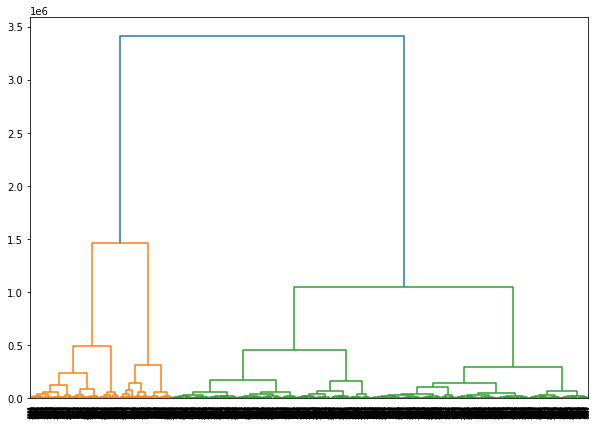

In [45]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeID'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>],
       [<Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'WorkLifeBal

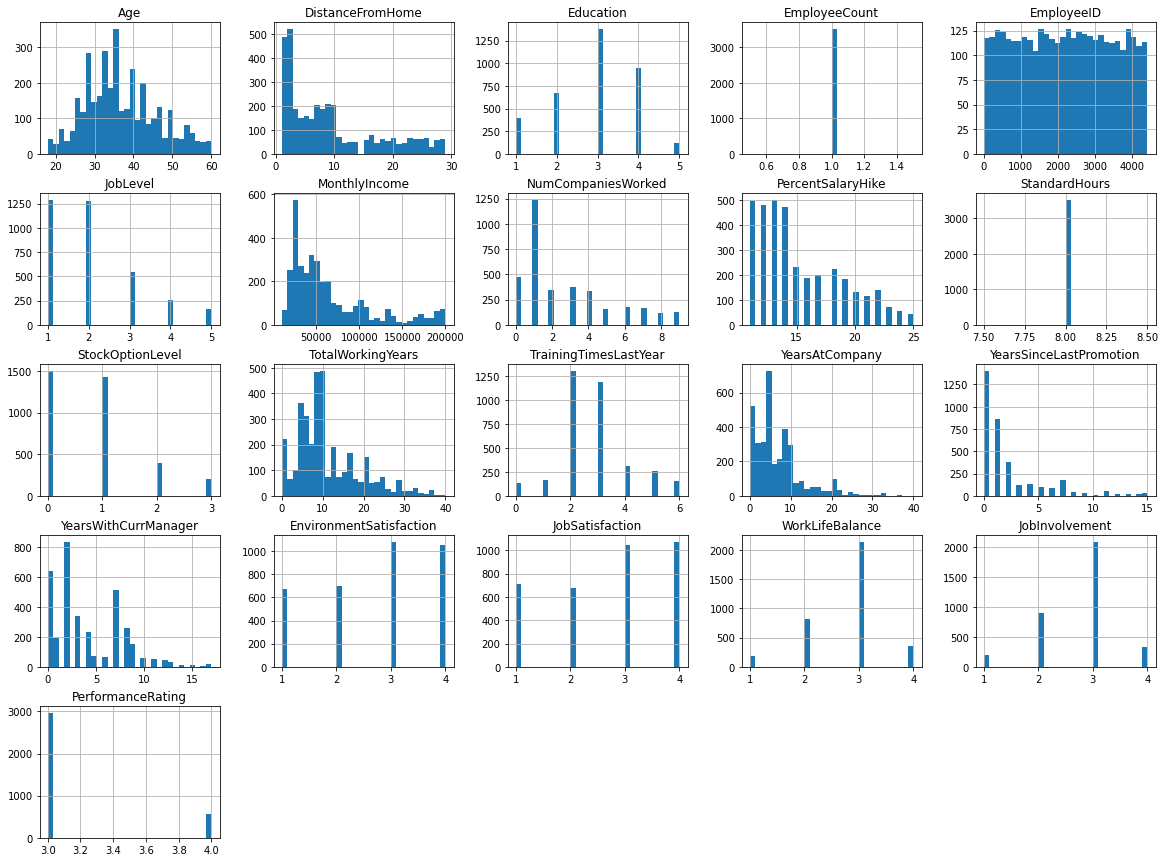

In [46]:
train_set.hist(bins=30, figsize=(20, 15))

## Chercher les corrélations

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='DistanceFromHome', ylabel='Age'>,
        <Axes: xlabel='MonthlyIncome', ylabel='Age'>,
        <Axes: xlabel='TotalWorkingYears', ylabel='Age'>,
        <Axes: xlabel='YearsAtCompany', ylabel='Age'>,
        <Axes: xlabel='YearsSinceLastPromotion', ylabel='Age'>,
        <Axes: xlabel='YearsWithCurrManager', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='DistanceFromHome'>,
        <Axes: xlabel='DistanceFromHome', ylabel='DistanceFromHome'>,
        <Axes: xlabel='MonthlyIncome', ylabel='DistanceFromHome'>,
        <Axes: xlabel='TotalWorkingYears', ylabel='DistanceFromHome'>,
        <Axes: xlabel='YearsAtCompany', ylabel='DistanceFromHome'>,
        <Axes: xlabel='YearsSinceLastPromotion', ylabel='DistanceFromHome'>,
        <Axes: xlabel='YearsWithCurrManager', ylabel='DistanceFromHome'>],
       [<Axes: xlabel='Age', ylabel='MonthlyIncome'>,
        <Axes: xlabel='DistanceFromHome', ylabel='MonthlyIncome'>,


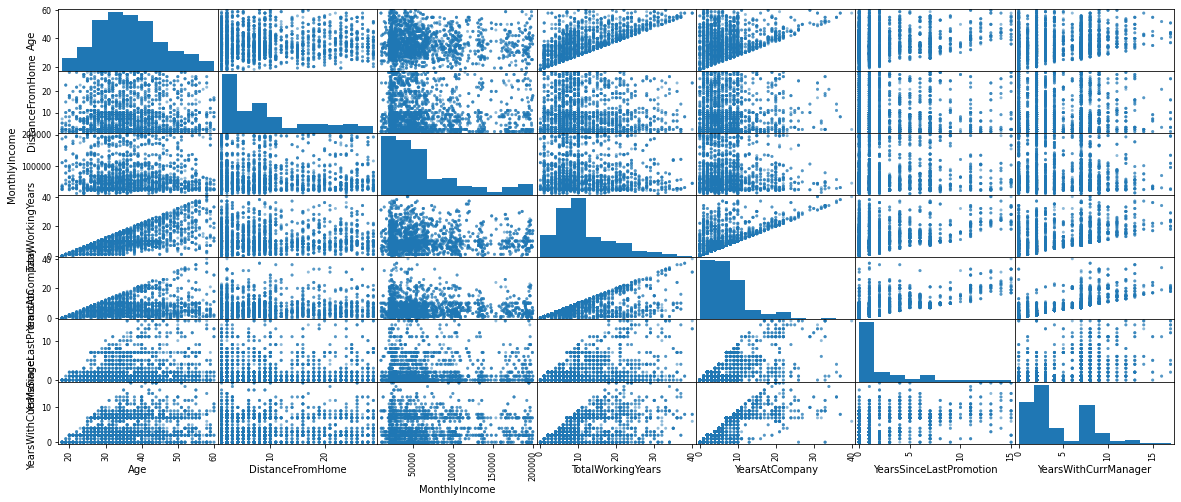

In [50]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
scatter_matrix(train_set[attributes], figsize=(20, 8))